# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [118]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

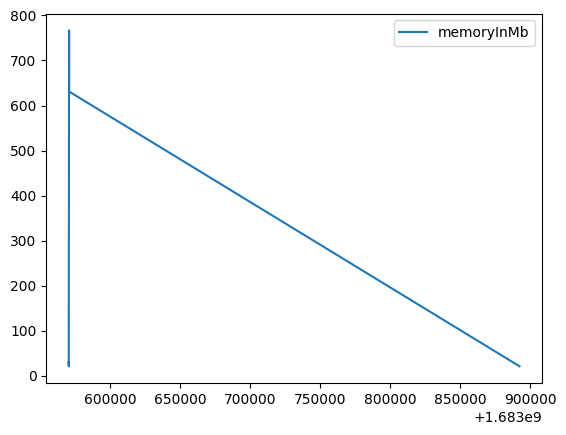

In [119]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

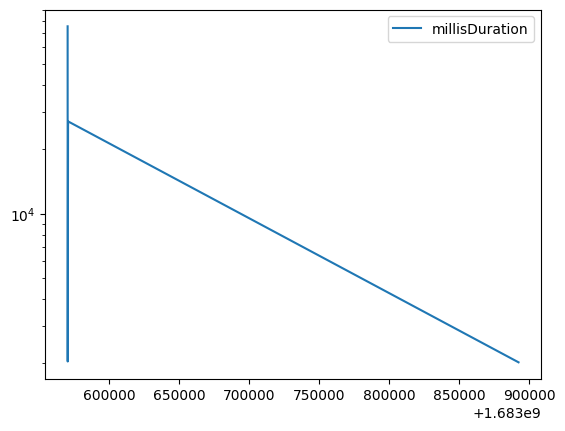

In [120]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [121]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

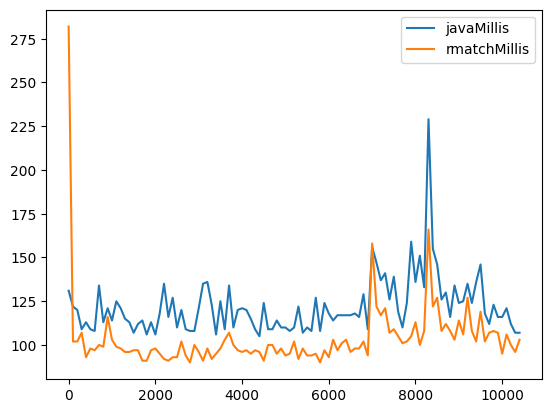

In [122]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

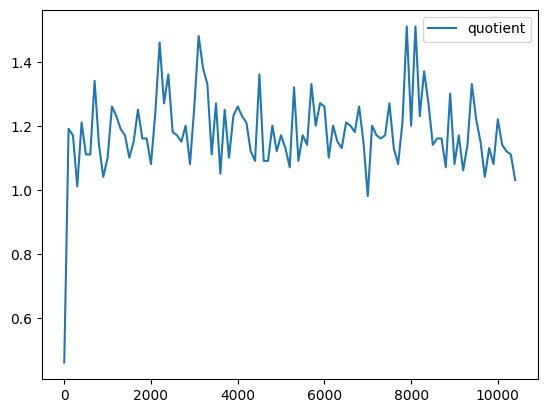

In [123]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [124]:
df[" quotient"].std()

0.12511474586834134

In [125]:
df[" quotient"].mean()

1.181047619047619

In [126]:
df[" javaMillis"].std()

16.22013739593032

In [127]:
df[" javaMillis"].mean()

121.65714285714286

In [128]:
df[" regexMillis"].std()

21.037869221761536

In [129]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [130]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [131]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
5,1684152191817,bdabd9ae-3051-49bd-9a96-cbf513e16868,master,rmatch,1091,7280,java,78,698,125401,164,1154369,1179077,0.000000
6,1684152222095,38ac9d4f-7349-4e42-ab47-37cf86f755f7,master,rmatch,446,6237,java,67,542,112977,2,1154369,1179077,0.000000
7,1684153312432,836b4ddb-98e9-4ace-bed1-07d9962e5864,master,rmatch,809,10224,java,69,651,112977,2,1154369,1179077,0.000000
8,1684153360840,583ee166-addc-4c5e-8415-f2c33af0f740,master,rmatch,290,9247,java,70,558,112977,2,1154369,1179077,0.000000
9,1684153420628,a940986d-51d3-4163-b922-b1f4ec19efae,master,rmatch,560,9700,java,70,593,112977,2,1154369,1179077,0.000000


In [132]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [133]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
5,1684152191817,bdabd9ae-3051-49bd-9a96-cbf513e16868,master,rmatch,1091,7280,java,78,698,125401,164,1154369,1179077,0.000000,1.869629e+08,1.949986e+09,10.429799
6,1684152222095,38ac9d4f-7349-4e42-ab47-37cf86f755f7,master,rmatch,446,6237,java,67,542,112977,2,1154369,1179077,0.000000,2.182283e+08,2.511236e+09,11.507380
7,1684153312432,836b4ddb-98e9-4ace-bed1-07d9962e5864,master,rmatch,809,10224,java,69,651,112977,2,1154369,1179077,0.000000,1.331270e+08,2.090768e+09,15.705069
8,1684153360840,583ee166-addc-4c5e-8415-f2c33af0f740,master,rmatch,290,9247,java,70,558,112977,2,1154369,1179077,0.000000,1.471926e+08,2.439229e+09,16.571685
9,1684153420628,a940986d-51d3-4163-b922-b1f4ec19efae,master,rmatch,560,9700,java,70,593,112977,2,1154369,1179077,0.000000,1.403186e+08,2.295261e+09,16.357504


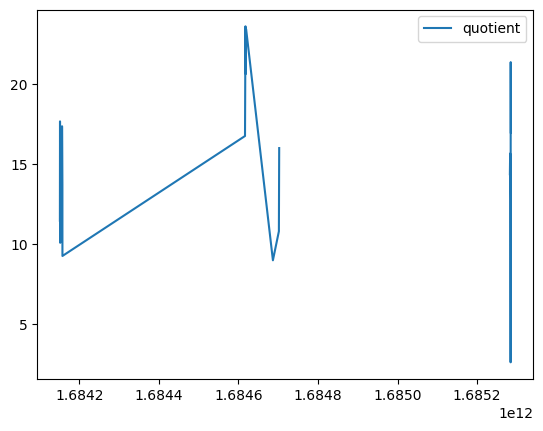

In [140]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

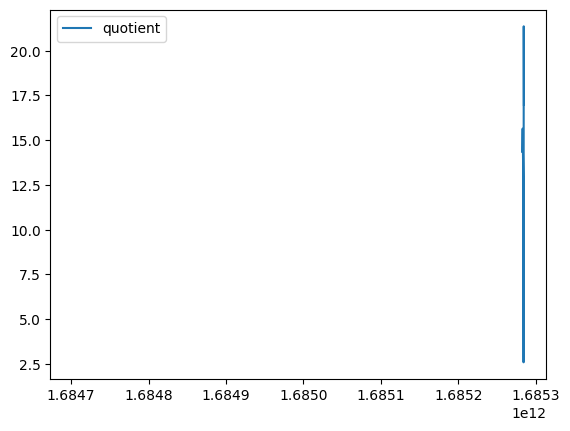

In [138]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [139]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
23,1684702539043,4755e6ec-7255-47c8-be3f-55d700bb8a4a,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1203,96585,java,532,6042,1144409,8,1154369,1179077,0.000000,1.409215e+07,2.252714e+08,15.985601
24,1685269616045,dfcacb38-e669-4a95-b22f-bb952fb0dd83,u/la3lma/refactoring-a-la-chatgpt2,rmatch,479,218043,java,535,30216,1144409,8,1154369,0,NaN,0.000000e+00,0.000000e+00,NaN
25,1685270656354,1909c62a-899c-4d2a-9605-0c985055480f,u/la3lma/refactoring-a-la-chatgpt2,rmatch,807,183985,java,535,12382,1144409,8,1154369,0,NaN,0.000000e+00,0.000000e+00,NaN
26,1685280998691,c21534dd-23a9-4ca6-93ca-a3c4ec1e0890,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1899,110139,java,532,6287,1144409,8,1154369,0,NaN,0.000000e+00,0.000000e+00,NaN
27,1685282293907,5ea088e6-e498-4d4c-9f02-6b1c7e8bd173,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2027,106905,java,534,7449,1144409,8,1154369,1179077,14.351591,1.273177e+07,1.827212e+08,14.351591
28,1685282940023,a0900024-9e4a-4ce4-8959-0934bad7f334,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1687,106253,java,531,6792,1144409,8,-1,1154369,15.643846,-1.086434e+01,-1.699601e+02,15.643846
29,1685283779557,a008c703-1bb0-4d0b-9934-526bcc8e2221,u/la3lma/refactoring-a-la-chatgpt2,rmatch,1374,146133,java,552,11436,1144409,8,-1,1154369,12.778332,-7.899441e+00,-1.009417e+02,12.778332
30,1685284122678,fa90c3f3-c37a-44ff-9b1b-58ba94b1fb51,u/la3lma/refactoring-a-la-chatgpt2,rmatch,2157,97215,java,534,37551,1144409,8,19566,1154369,2.588879,2.323344e+05,6.014855e+05,2.588879
31,1685284346560,d257b8a4-d4c0-4dbb-8164-baf71b691a80,u/la3lma/refactoring-a-la-chatgpt2,rmatch,745,150880,java,537,7064,1144409,8,19566,1154369,21.359003,1.496977e+05,3.197393e+06,21.359003
32,1685284590304,f38faef7-86f0-463b-9b3c-d40a9b3ed974,u/la3lma/refactoring-a-la-chatgpt2,rmatch,624,162915,java,534,9602,1144409,8,19566,1154369,16.966778,1.386391e+05,2.352258e+06,16.966778
